<a href="https://colab.research.google.com/github/massilva/dominando-data-science/blob/main/aula07e08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning 101

## Aula 07

### Preparando os dados

In [1]:
!pip install sweetviz

     |████████████████████████████████| 15.1 MB 27.3 MB/s 


In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
data = pd.read_csv(url)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [5]:
data['sex'] = data['sex'].map({'female': 0, 'male': 1})
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})
data['charges'] = data['charges'] / 1000
data['region'] = data['region'].map({region: i for i, region in enumerate(data['region'].unique())})
data.head()
# eda = sv.analyze(source=data, target_feat='sex')

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16.884924
1,18,1,33.770,1,0,1,1.725552
2,28,1,33.000,3,0,1,4.449462
3,33,1,22.705,0,0,2,21.984471
4,32,1,28.880,0,0,2,3.866855


### Algoritmos

#### Método dos Mínimos Quadrados (MMQ)

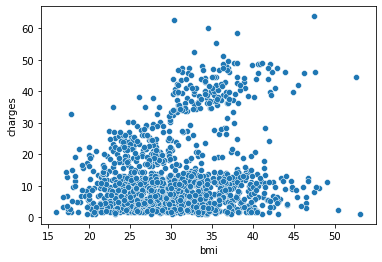

In [6]:
import seaborn as sb

sb.scatterplot(x = 'bmi', y='charges', data = data)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [8]:

# padrão na matemática utilizar letra maiuscula para Matriz
X = data[['bmi']]
y = data['charges'] # variável resposta

new_bmi_data = [15, 22, 28, 33]
new_bmi_df = pd.DataFrame({'bmi': new_bmi_data})
model = LinearRegression()

model.fit(X, y)
print('b0', model.intercept_)
print('b1', model.coef_[0])
print()
print(':: MORE')
print('fi', model.fit_intercept)
print('co', model.coef_)
predict = model.predict(new_bmi_df)
print(predict)


b0 1.1929372089611512
b1 0.3938730307973951

:: MORE
fi True
co [0.39387303]
[ 7.10103267  9.85814389 12.22138207 14.19074723]


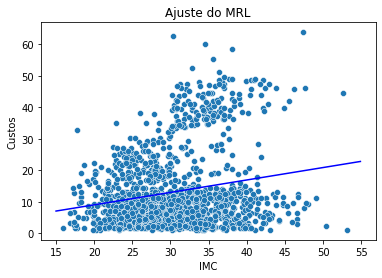

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def plot(model, data, x_label, y_label, colors, hue_label = None):
  b0 = model.intercept_
  b1,*bs = model.coef_

  sb.scatterplot(x = x_label, y = y_label, hue = hue_label, data = data)
  x_points = np.arange(15, 55, 0.1)
  base = b0 + b1 * x_points
  plt.plot(x_points, base, color = colors[0])

  for i, b in enumerate(bs, 1):
    y_points = base + b * i
    plt.plot(x_points, y_points, color = colors[i])
    base = y_points

  plt.title('Ajuste do MRL')
  plt.xlabel('IMC')
  plt.ylabel('Custos')
  plt.show()

plot(model, data, x_label='bmi', y_label='charges', colors=['blue', 'orange'])

In [10]:
# Add variável preditora

X = data[['bmi', 'smoker']]
y = data['charges']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25)

model.fit(Xtrain, ytrain)

predict = model.predict(Xtest)

eqm = mean_squared_error(ytest, predict)

eqm

46.349498636852964

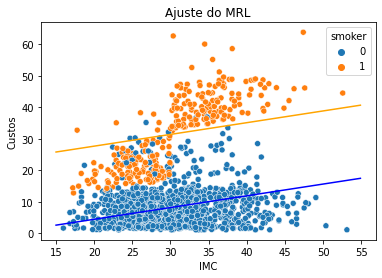

In [11]:
plot(model, data, x_label='bmi', y_label='charges', hue_label='smoker', colors=['blue', 'orange'])

In [12]:
def mean_error_n(model, n, mean_error_func=mean_squared_error, predict_variables=['bmi', 'smoker'], response_variable='charges', test_size=0.25):
  X = data[predict_variables]
  y = data[response_variable]
  Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=test_size)
  model.fit(Xtrain, ytrain)
  predict = model.predict(Xtest)
  return np.array([mean_error_func(ytest, predict) for _ in range(n)]).mean()

In [13]:
n = 10
print('EQM médio em #{} vezes: {}'.format(n, mean_error_n(model, n)))
print('MAE médio em #{} vezes: {}'.format(n, mean_error_n(model, n, mean_error_func=mean_absolute_error)))

EQM médio em #10 vezes: 47.00095501187463
MAE médio em #10 vezes: 5.820216322551557


### Ajuste do Modelo de Regressão Linear

Relacionando o imc (`bmi`) com as outras variáveis preditoras ('smoker', 'sex', 'children', 'region', 'age') para identificar a relação com os custos (`charges`).

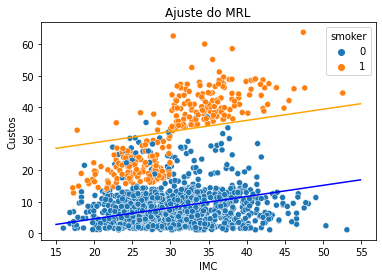

MSE: 52.98978871039585
MAE: 5.5840704156326755



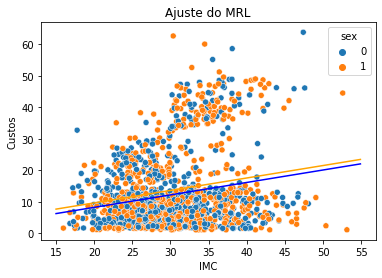

MSE: 140.70730583607482
MAE: 9.357570691646156



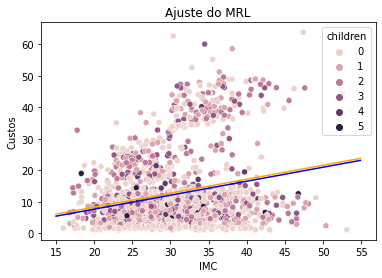

MSE: 140.89764636920026
MAE: 9.392485226095586



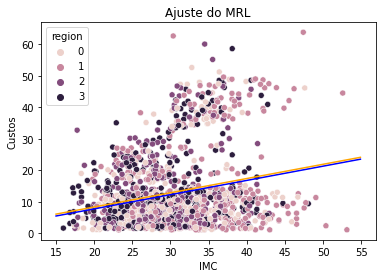

MSE: 137.3334081163568
MAE: 9.174561958363043



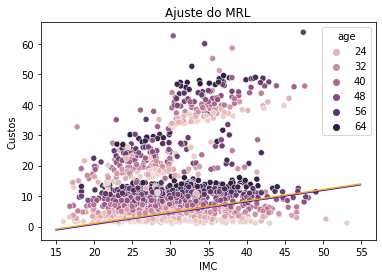

MSE: 117.23853143165783
MAE: 8.89320191370292



In [14]:
y = data['charges']
n = 10
predictions = ['smoker', 'sex', 'children', 'region', 'age']

for item in predictions:
  X = data[['bmi', item]]
  Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25)
  model.fit(Xtrain, ytrain)
  predict = model.predict(Xtest)
  plot(model, data, x_label='bmi', y_label='charges', hue_label=item, colors=['blue', 'orange'])
  print('MSE: {}'.format(np.array([mean_squared_error(ytest, predict) for _ in range(n)]).mean()))
  print('MAE: {}'.format(np.array([mean_absolute_error(ytest, predict) for _ in range(n)]).mean()))
  print()


## Aula 08 - KNN & Árvore de decisão

In [15]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [16]:
def holdoutRepeated(model, X, y, error_function=mean_squared_error, n = 100, test_size = 0.25): 
    error_train, error_test = [], []

    for i in range(n):
        Xtrain , Xtest, ytrain, ytest  = train_test_split(X, y, test_size = test_size)
        reg = model
        reg.fit(Xtrain, ytrain)

        predicts = reg.predict(Xtrain)
        error_train.append(error_function(ytrain, predicts))

        predicts = reg.predict(Xtest)
        error_test.append(error_function(ytest, predicts))
    
    res_train = np.array(error_train).mean().round(2)
    res_test = np.array(error_test).mean().round(2)
    return res_train, res_test 

#### Erro absoluto médio X Erro quadrático médio

In [21]:
predictions = ['smoker', 'sex', 'children', 'region', 'age']
models = [
  LinearRegression(),
  *[KNeighborsRegressor(n_neighbors=i) for i in range(5, 50, 10)],
  *[DecisionTreeRegressor(max_depth=i) for i in range(1, 6)],
]
names = [
  'Regressão Linear',
  *['KNN - K = {}'.format(i) for i in range(5, 50, 10)],
  *['Árvore - prof. - {}'.format(i) for i in range(1, 6)],
]
errors_functions = [mean_squared_error, mean_absolute_error]
errors_name = ['MSE', 'MAE']

for idx, error_function in enumerate(errors_functions):
  print(':: {}'.format(errors_name[idx]))

  for item in predictions:
    trains, tests = [], []
    to_analyze = ['bmi', item]
    print('::: {0}, {1} --> {2}'.format(*to_analyze, 'charges'))
    X = data[to_analyze]

    for model in models:
      train, test = holdoutRepeated(model, X, y, error_function=error_function)
      trains.append(train)
      tests.append(test)

    results = pd.DataFrame({
        '{} Train'.format(errors_name[idx]): trains,
        '{} Test'.format(errors_name[idx]): tests
      },
      index=names
    )
    print(results.sort_values(by = '{} Test'.format(errors_name[idx])))
    print()


:: MSE
::: bmi, smoker --> charges
                    MSE Train  MSE Test
Árvore - prof. - 3      33.20     34.60
Árvore - prof. - 4      32.41     35.40
Árvore - prof. - 2      34.05     35.50
Árvore - prof. - 5      31.08     36.74
KNN - K = 5             31.51     46.88
Regressão Linear        50.26     49.92
KNN - K = 15            44.19     50.80
Árvore - prof. - 1      56.01     55.02
KNN - K = 25            54.05     58.07
KNN - K = 35            67.73     72.33
KNN - K = 45            80.77     84.16

::: bmi, sex --> charges
                    MSE Train  MSE Test
Regressão Linear       140.32    141.19
KNN - K = 45           137.22    141.44
Árvore - prof. - 1     140.28    142.21
Árvore - prof. - 2     138.53    142.27
KNN - K = 35           135.64    142.74
Árvore - prof. - 3     135.78    146.02
KNN - K = 25           133.29    146.07
Árvore - prof. - 4     132.61    149.17
KNN - K = 15           129.73    150.76
Árvore - prof. - 5     127.09    157.60
KNN - K = 5        

#### K Ótimo

In [23]:
def holdoutRepeatedTest(model, X, y, error_function=mean_squared_error, n = 100, test_size = 0.25): 
    error_test = []

    for i in range(n):
        Xtrain , Xtest, ytrain, ytest  = train_test_split(X, y, test_size = test_size)
        reg = model
        reg.fit(Xtrain, ytrain)
        predicts = reg.predict(Xtest)
        error_test.append(error_function(ytest, predicts))
    
    res_test = np.array(error_test).mean().round(2)
    return res_test 

In [28]:
import math

def get_best(model_class, key_attr, step=3, max=1000, lower=3):
  best_index, best_test = math.inf, math.inf
  upper = max
  '''Número de interações que o algoritmo poderá ficar sem encontrar um valor melhor que o já encontrado

  - o próximo número, depois da raiz quadrada do máximo, divísivel por `step`
  '''
  stop_when = ((max ** 0.5) // step + 1) * step
  not_change_count = 0 #número de vezes que o algoritmo consecutivamente não encontrou um valor melhor que o melhor

  X = data[['bmi', 'smoker']]

  for i in range(lower, upper, step):
    params = {
        key_attr: i,
    }
    model = model_class(**params)
    test = holdoutRepeatedTest(model, X, y)

    if best_test > test:
      best_index, best_test = i, test
      not_change_count = 0
    else:
      not_change_count += 1

    if not_change_count >= stop_when:
      break

  return best_index, best_test


In [33]:
best_k, best_test = get_best(KNeighborsRegressor, 'n_neighbors', lower=1, step=1)
print('n_neighbors: {}, value: {}'.format(best_k, best_test))

n_neighbors: 6, value: 46.91


In [34]:
best_k, best_test = get_best(KNeighborsRegressor, 'n_neighbors')
print('n_neighbors: {}, value: {}'.format(best_k, best_test))

n_neighbors: 6, value: 45.54


#### Profundidade ótima

In [32]:
best_depth, best_test = get_best(DecisionTreeRegressor, 'max_depth', lower=1, step=1)
print('depth: {}, value: {}'.format(best_depth, best_test))

depth: 3, value: 34.8


In [35]:
best_depth, best_test = get_best(DecisionTreeRegressor, 'max_depth')
print('depth: {}, value: {}'.format(best_depth, best_test))

depth: 3, value: 34.59
